In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint

### Wyznaczanie $\frac{N}{n_s}$

1.8949307330008147


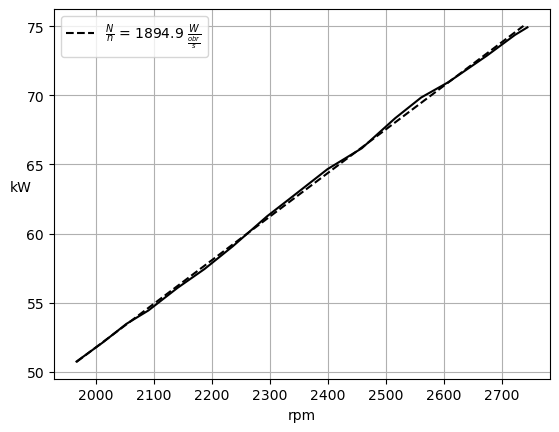

In [12]:
df = pd.read_table("../input/new_power_rpm.txt", sep = " ")

df['power'] = df['bhp']/1.34

rpms = np.arange(min(df["rpm"]), max(df["rpm"]), 10)
z = np.polyfit(df["rpm"], df["power"], 1)
p = np.poly1d(z)

pprint(p[1]*60)

latex = {
    'fraction': "$\\frac{N}{n}$",
    'power': "$\\frac{W}{\\frac{obr}{s}}$"
}



plt.plot(rpms, p(rpms), label = f"{latex['fraction']} = {round(p[1]*60*1000, 1)} {latex['power']}", linestyle = 'dashed', c = 'black')
plt.plot(df["rpm"], df["power"], c = 'black')
plt.legend()
plt.xlabel("rpm")
plt.ylabel("kW", rotation = 0)
plt.grid(True)

plt.savefig("../img/rpm.jpg", dpi = 200)

### Power(h)

In [13]:
# f = open("../input/excel_new.txt", "r")
# out = open("../input/excel_new_1.txt", "w")

# for row in f:
#     out.write(row.replace("\t", " "))
    
# out.close()
# f.close()
    


In [14]:
power = pd.read_table("../input/power_h.txt", sep = " ")
excel1 = pd.read_table("../input/excel_new.txt", sep = " ")

power['h(m)'] = power["h(ft)"]*0.3048
power['kw'] = power["bhp"]/1.34

k = 0.25
excel1['nowe_moc(h)'] = 74000* (excel1["sigma"] - k)/(1- k)
excel1['nowe_Moc/obroty'] = excel1['nowe_moc(h)']/(2750/60)

print(power.columns)
print(excel1.columns)
display(excel1)

print(excel1.to_latex())

Index(['h(ft)', 'bhp', 'h(m)', 'kw'], dtype='object')
Index(['h', 'rho(h)', 'sigma', 'power(h)', 'Moc/obroty', 'conts(h)',
       'nowe_moc(h)', 'nowe_Moc/obroty'],
      dtype='object')


,h,rho(h),sigma,power(h),Moc/obroty,conts(h),nowe_moc(h),nowe_Moc/obroty
0,0.0,1.225,1.0000,74000.000,1614.545,89.022,74000.000000,1614.545455
1,0.5,1.167,0.9527,70191.659,1531.454,88.637,69333.066667,1512.721455
2,1.0,1.111,0.9069,66514.641,1451.229,88.228,64814.133333,1414.126545
3,1.5,1.032,0.8424,61327.418,1338.053,87.574,58450.133333,1275.275636
4,2.0,1.006,0.8212,59620.231,1300.805,87.337,56358.400000,1229.637818
5,2.5,1.000,0.7808,56370.009,1229.891,86.849,52372.266667,1142.667636
6,3.0,0.908,0.7412,53185.448,1160.410,86.320,48465.066667,1057.419636
7,3.5,0.863,0.7045,50230.701,1095.943,85.775,44844.000000,978.414545
8,4.0,0.819,0.6686,47341.615,1032.908,85.185,41301.866667,901.131636
9,4.5,0.768,0.6269,43992.902,959.845,84.416,37187.466667,811.362909


\begin{tabular}{lrrrrrrrr}
\toprule
{} &    h &  rho(h) &   sigma &   power(h) &  Moc/obroty &  conts(h) &   nowe\_moc(h) &  nowe\_Moc/obroty \\
\midrule
0  &  0.0 &   1.225 &  1.0000 &  74000.000 &    1614.545 &    89.022 &  74000.000000 &      1614.545455 \\
1  &  0.5 &   1.167 &  0.9527 &  70191.659 &    1531.454 &    88.637 &  69333.066667 &      1512.721455 \\
2  &  1.0 &   1.111 &  0.9069 &  66514.641 &    1451.229 &    88.228 &  64814.133333 &      1414.126545 \\
3  &  1.5 &   1.032 &  0.8424 &  61327.418 &    1338.053 &    87.574 &  58450.133333 &      1275.275636 \\
4  &  2.0 &   1.006 &  0.8212 &  59620.231 &    1300.805 &    87.337 &  56358.400000 &      1229.637818 \\
5  &  2.5 &   1.000 &  0.7808 &  56370.009 &    1229.891 &    86.849 &  52372.266667 &      1142.667636 \\
6  &  3.0 &   0.908 &  0.7412 &  53185.448 &    1160.410 &    86.320 &  48465.066667 &      1057.419636 \\
7  &  3.5 &   0.863 &  0.7045 &  50230.701 &    1095.943 &    85.775 &  44844.000000 &       978.

C:\Users\marek\AppData\Local\Temp\ipykernel_28624\2657763072.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(excel1.to_latex())


In [15]:
# plt.plot(power['h(m)'], power['kw'], label = 'rzeczywiste',  c = 'black')
# # plt.plot(excel1['h']*1000, excel1['power(h)']/1000, label = "stare")
# plt.plot(excel1['h']*1000, excel1['nowe_moc(h)']/1000, label = "Ze wzoru dla k = 0.25", linestyle = "dashed", c = 'black')
# plt.legend()
# plt.ylabel("kW", rotation = 0)
# plt.xlabel("h(m)")
# plt.grid(True)
# # plt.savefig("../img/power_alt_wzor.jpg", dpi = 300)


### Robienie tabelek

Ładowanie danych do df in robienie interpolacji

In [16]:
eta_j = pd.read_table("../input/eta_vs_J.txt", sep = " ")
pow_coef_j = pd.read_table("../input/power_coef_vs_J.txt", sep = " ")
excel = pd.read_table("../input/excel_new.txt", sep = " ")

excel = excel1

# Array z posuwami
j = np.linspace(0, 1.0, 20)

# interpolowane 
eta = np.polyfit(eta_j["J"], eta_j["eta"], 20)
pow = np.polyfit(pow_coef_j["J"], pow_coef_j["p"], 20)

p_eta = np.poly1d(eta)
p_pow_coef_j = np.poly1d(pow)

# wartości po zinterpolowaniu
eta_inter = p_eta(j)
power_coef_inter = p_pow_coef_j(j)

# plt.plot(eta_j["J"], eta_j["eta"], label = "raw")
# plt.plot(j, eta_inter, label = "inter")
# plt.legend()

# plt.plot(pow_coef_j["J"], pow_coef_j["p"], label = "raw")
# plt.plot(j, power_coef_inter, label = "inter")
# plt.legend()

# display(excel)
print(type(p_eta(0.6)))


<class 'numpy.float64'>


c:\Users\marek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
c:\Users\marek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
# f = open("../input/excel.txt", "r")
# out = open("../input/excel_new.txt", "w")
# for row in f:
#     # pprint(row)
    
#     out.write(row.replace("\t", " "))
#     # print(row.replace("\t", " "))
# f.close()

In [18]:
alts = [    0,
            0.5,
            1,
            1.5,
            2,
            2.5,
            3,
            3.5,
            4,
]


In [23]:
# funkcje pomocnicze

def ns(cn, rho, power_to_ns, D):
    return (1/cn * 1/(rho* D**5) * power_to_ns)**0.5

def N_r(power_to_ns, ns, eta):
    return power_to_ns*ns* eta

def V(J, n, D):
    if n>2800:
        return J*2800*D
    return J*n*D



Index(['h', 'rho(h)', 'sigma', 'power(h)', 'Moc/obroty', 'conts(h)',
       'nowe_moc(h)', 'nowe_Moc/obroty', 'obroty'],
      dtype='object')


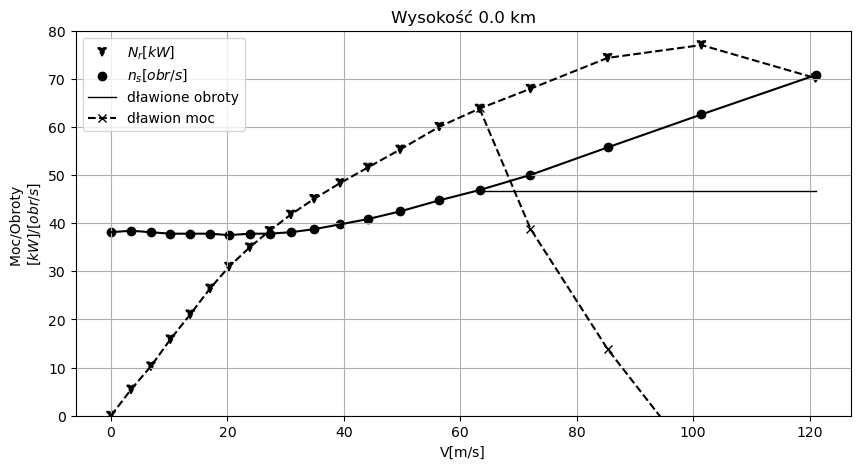

3.0
 print(round(j_i,3), power_coef, eta, round(ns_i,3) * 60, row["rho(h)"], row["nowe_Moc/obroty"])
0.0 0.062 0 2150.52 0.908 1057.42 35.84220464842706 0.0 0.0
3.0
 print(round(j_i,3), power_coef, eta, round(ns_i,3) * 60, row["rho(h)"], row["nowe_Moc/obroty"])
0.053 0.061 0.088 2168.1 0.908 1057.42 36.134798928933805 3362.4499993421205 3.252131903604042
3.0
 print(round(j_i,3), power_coef, eta, round(ns_i,3) * 60, row["rho(h)"], row["nowe_Moc/obroty"])
0.105 0.062 0.167 2150.52 0.908 1057.42 35.84220464842706 6329.344094569737 6.4515968367168695
3.0
 print(round(j_i,3), power_coef, eta, round(ns_i,3) * 60, row["rho(h)"], row["nowe_Moc/obroty"])
0.158 0.063 0.26 2133.42 0.908 1057.42 35.556604840800105 9775.5489235973 9.600283307016028
3.0
 print(round(j_i,3), power_coef, eta, round(ns_i,3) * 60, row["rho(h)"], row["nowe_Moc/obroty"])
0.211 0.063 0.345 2133.42 0.908 1057.42 35.556604840800105 12971.401456311802 12.800377742688037
3.0
 print(round(j_i,3), power_coef, eta, round(ns_i,3) 

In [24]:
print(excel.columns)

out = open("../output/all_tables.txt", "w")

excel = excel[excel.columns.to_list()].round(3)
excel["obroty"] = excel['nowe_moc(h)']/excel['nowe_Moc/obroty']
# print(excel.dtypes)
# display(excel.head(10))

for i, row in excel.iterrows():
    
    # print(row["Moc_obroty"])
    # print(f"\n========= {row['h']} km, moc {row['power(h)']} W ===========")
    
    df_temp = pd.DataFrame()
    k = 0
    for j_i in j:
        
        D = 1.71
        
        eta =           round(float(p_eta(j_i)), 3)
        power_coef =    round(float(p_pow_coef_j(j_i)), 3)
        
        if round(eta, 3) == 0.043:
            eta = 0
         
        ns_i = ns(power_coef, row["rho(h)"], row["nowe_Moc/obroty"], D)
        
        
        moc_rozp = N_r(row["nowe_Moc/obroty"], ns_i, eta)
        speed = V(j_i, ns_i, D)
        
        if i == 6:
            print(row["h"])
            print(' print(round(j_i,3), power_coef, eta, round(ns_i,3) * 60, row["rho(h)"], row["nowe_Moc/obroty"])')
            print(round(j_i,3), power_coef, eta, round(ns_i,3) * 60, row["rho(h)"], row["nowe_Moc/obroty"], ns_i, moc_rozp, speed)
        
        # print(speed)
        
        df_temp.loc[k,"J"] = j_i
        df_temp.loc[k,"Cn"] = power_coef
        df_temp.loc[k,"eta"] = eta
        df_temp.loc[k,"ns"] = round(ns_i,3) * 60
        df_temp.loc[k,"V"]  = round(speed, 3)
        df_temp.loc[k,"N"]  = round(row['nowe_moc(h)']/1000,3)
        df_temp.loc[k,"Nr"] = round(moc_rozp/1000,3)
        # print(row['power(h)'])
        
        k+=1
    
    
    
    if i == 0:    
        fig, ax = plt.subplots( figsize = (10, 5))
        ax.plot(df_temp['V'], df_temp["Nr"], c = "black", linestyle = "dashed")
        ax.scatter(df_temp['V'], df_temp["Nr"], marker = 'v' , c = "black", linestyle = "dashed", label = "$N_r [kW]$")
        ax.plot(df_temp['V'], df_temp["ns"]/60, c = "black", linestyle = "solid")
        ax.scatter(df_temp['V'], df_temp["ns"]/60, marker = 'o', c = "black", linestyle = "solid", label = "$n_s [obr/s]$")
        
        #find v when ns>2800
        new_v = []
        power_max = 0.0
        for i, row2 in df_temp.iterrows():
            if row2["ns"] > 2800:
                new_v.append(row2["V"]) 
                power_max = row2["Nr"]
        
        ax.plot(new_v, [2800/60 for _ in range(len(new_v))], label = "dławione obroty", c = "black", linewidth = 1)
        ax.plot(new_v, [power_max*(0.91 - 25*(i / power_max)) for i in range(len(new_v))], marker = 'x', linestyle = "dashed", c= "black", label = "dławion moc")
        ax.set_ylim([0, 80])
        
        for i, row3 in df_temp.iterrows():
            if row3["ns"]>2800:
                pass        
        
        ax.grid(True)
        ax.set_title(f"Wysokość {row['h']} km")
        ax.legend()
        ax.set_ylabel("Moc/Obroty \n$[kW]/[obr/s]$")
        ax.set_xlabel("V[m/s]")
        
        plt.savefig("../img/power_obr.jpg", dpi = 200)
        plt.show()
    # s = df.style.
    
    # display(df_temp)
    df_temp.to_csv(f"../../proj6/input/sub_tables/height_{row['h']}.csv")
    
    
    latex = df_temp.style.set_table_styles(
    [
        {"selector": "toprule", "props": ":hline;"},
        {"selector": "midrule", "props": ":hline;"},
        {"selector": "bottomrule", "props": ":hline;"},
    ]
    ).format(precision=3).to_latex(
        column_format="|l|r|r|r|r|r|r|r|", 
        caption= f"Wysokość {row['h']} km\nMaksymalna moc rozporządzalna {round(float(max(df_temp['Nr'])), 3)} kW",
        multicol_align='r',
        position="h", 
        position_float="centering"
        )
    
    latex = latex.replace(
        "& J & Cn & eta & ns & V & N & Nr", 
        "& $J$ & $C_n$ & $\eta$ & $n_s [obr/s]$ & $V [m/s]$ & $N[kW]$ & $N_r[kW]$")
    out.write(latex+"\FloatBarrier\n")
        
out.close()


